In [35]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from numpy.polynomial import Polynomial

#Import DJIA datasets

In [36]:
# data = pd.read_csv("^dji_d (1929).csv", sep=';')
data = pd.read_csv("^dji_d (1929).csv")

In [37]:
data.drop(['Open', 'High', 'Low'], axis=1, inplace=True)
data.set_index('Date', inplace=True)

## Calculation of prior returns and volatility

In [38]:
data['priorReturns'] = data['Close'].pct_change()
data['volatility'] = data['priorReturns'].rolling(window=200).std()*(200**0.5)
cond_returns = pd.DataFrame()
table1 = pd.DataFrame()
data['condRet_table1'] = data['priorReturns'].shift(-1)
data['priorReturns'] = data['priorReturns'] * 100
data['condRet_table1'] = data['condRet_table1'] * 100
dataGroupByMean = pd.DataFrame()
dataGroupByMean = data.groupby(pd.cut(data['priorReturns'], np.arange(-3.75, 4, 0.5))).mean()
dataGroupByMean['condRet_table1'] = dataGroupByMean['condRet_table1']
dataGroupByMean

,Close,Volume,priorReturns,volatility,condRet_table1
priorReturns,,,,,
"(-3.75, -3.25]",2117.318095,7.274912e+07,-3.502619,0.283394,0.340466
"(-3.25, -2.75]",2468.296881,6.641356e+07,-2.988133,0.242209,0.168607
"(-2.75, -2.25]",2945.790780,6.962339e+07,-2.463324,0.207662,0.071277
"(-2.25, -1.75]",3079.226602,6.717315e+07,-1.973488,0.197389,-0.027078
"(-1.75, -1.25]",2866.024063,5.632240e+07,-1.470981,0.170186,-0.132931
"(-1.25, -0.75]",2585.268426,4.254591e+07,-0.968492,0.148643,-0.049860
"(-0.75, -0.25]",2296.648267,3.365348e+07,-0.469539,0.127634,-0.050511
"(-0.25, 0.25]",2203.046310,2.997055e+07,0.005994,0.118020,0.012484
"(0.25, 0.75]",2340.059106,3.380715e+07,0.475073,0.124729,0.067530


In [39]:
# data['priorReturns'] = data['priorReturns'].fillna(0)
# data['condRet_table1'] = data['condRet_table1'].fillna(0)

In [40]:
dataGroupByStd = pd.DataFrame()
dataGroupByStd = data.groupby(pd.cut(data['priorReturns'], np.arange(-3.75, 4, 0.5))).std()
dataGroupByStd['condRet_table1'] = dataGroupByStd['condRet_table1']
dataGroupByStd

,Close,Volume,priorReturns,volatility,condRet_table1
priorReturns,,,,,
"(-3.75, -3.25]",3687.743967,1.422621e+08,0.142058,0.112871,2.271515
"(-3.25, -2.75]",3934.364939,1.274353e+08,0.139497,0.109287,2.135496
"(-2.75, -2.25]",4104.627413,1.192104e+08,0.142464,0.100049,1.817563
"(-2.25, -1.75]",4180.972034,1.173397e+08,0.135711,0.099102,1.573091
"(-1.75, -1.25]",3949.416351,1.098431e+08,0.138170,0.088021,1.548590
"(-1.25, -0.75]",3697.016318,8.837522e+07,0.143190,0.078970,1.151558
"(-0.75, -0.25]",3458.577096,7.795030e+07,0.141764,0.065714,1.002370
"(-0.25, 0.25]",3451.505948,7.278815e+07,0.141742,0.057941,0.869477
"(0.25, 0.75]",3549.066279,7.685385e+07,0.140489,0.064056,0.897127


In [41]:
table1 = pd.DataFrame()
table1['condRet'] = dataGroupByMean['condRet_table1']
data.groupby(pd.cut(data['priorReturns'], np.arange(-3.75, 4, 0.5))).apply(lambda data: ttest_1samp(data['condRet_table1'], popmean=0, alternative='less'))

priorReturns
(-3.75, -3.25]        (1.1896736640978818, 0.8806446932315342)
(-3.25, -2.75]        (0.8243110624054014, 0.7942101871442142)
(-2.75, -2.25]         (0.561481277296456, 0.7124571074846706)
(-2.25, -1.75]      (-0.3275073604923944, 0.37173700855487535)
(-1.75, -1.25]        (-2.41270340046665, 0.00803089509813621)
(-1.25, -0.75]     (-1.8456092891840299, 0.032555821634914654)
(-0.75, -0.25]    (-3.0911728466385497, 0.0010041320683381377)
(-0.25, 0.25]                                       (nan, nan)
(0.25, 0.75]           (4.991366928036341, 0.9999996886381639)
(0.75, 1.25]           (5.812991702141689, 0.9999999964382679)
(1.25, 1.75]           (2.946466420958588, 0.9983475065633464)
(1.75, 2.25]           (1.2527531823357523, 0.894469059593324)
(2.25, 2.75]            (1.08591911093787, 0.8605618569227126)
(2.75, 3.25]            (1.132589688918344, 0.869732762709779)
(3.25, 3.75]        (-0.7143632911678396, 0.23868902179284168)
dtype: object

In [42]:
# data.groupby(pd.cut(data['priorReturns'], np.arange(-3.75, 4, 0.5))).apply(lambda data: ttest_1samp(data['condRet_table1'], popmean=0))


In [43]:
data.groupby(pd.cut(data['priorReturns'], np.arange(-3.75, 4, 0.5))).mean()

,Close,Volume,priorReturns,volatility,condRet_table1
priorReturns,,,,,
"(-3.75, -3.25]",2117.318095,7.274912e+07,-3.502619,0.283394,0.340466
"(-3.25, -2.75]",2468.296881,6.641356e+07,-2.988133,0.242209,0.168607
"(-2.75, -2.25]",2945.790780,6.962339e+07,-2.463324,0.207662,0.071277
"(-2.25, -1.75]",3079.226602,6.717315e+07,-1.973488,0.197389,-0.027078
"(-1.75, -1.25]",2866.024063,5.632240e+07,-1.470981,0.170186,-0.132931
"(-1.25, -0.75]",2585.268426,4.254591e+07,-0.968492,0.148643,-0.049860
"(-0.75, -0.25]",2296.648267,3.365348e+07,-0.469539,0.127634,-0.050511
"(-0.25, 0.25]",2203.046310,2.997055e+07,0.005994,0.118020,0.012484
"(0.25, 0.75]",2340.059106,3.380715e+07,0.475073,0.124729,0.067530


In [44]:
table1['t_test'] = np.abs(dataGroupByMean['condRet_table1']) / dataGroupByStd['condRet_table1']

In [45]:
table1['midPrior'] = np.arange(-3.5, 4, 0.5)

In [46]:
poly = PolynomialFeatures(degree=3) # add non-linear features (powers and interactions)
midPrior = poly.fit_transform(np.array(table1['midPrior']).reshape(1, -1))

scaler = StandardScaler()
midPrior = scaler.fit_transform(midPrior)
X_test = scaler.transform(midPrior)
# midPrior

In [47]:
coefficients = np.polyfit(table1['midPrior'], table1['condRet'], 3)
# coefficients = np.polyfit(midPrior.flatten(), table1['condRet'], 3)
derivatives=np.polyder(coefficients)
roots = np.roots(derivatives)
roots

array([ 1.81390311, -1.38311541])

In [48]:
p = np.poly1d(coefficients)
# fit values, and mean
yhat = p(table1['midPrior'])                         # or [p(z) for z in x]
ybar = np.sum(table1['condRet'])/len(table1['condRet'])          # or sum(y)/len(y)
ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((table1['condRet'] - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])

In [49]:
ssreg / sstot

0.8487620898884984

# Condition on Volume

In [50]:
def compute_axis(data):
    dataGroupByMean = pd.DataFrame()
    dataGroupByMean = data.groupby(pd.cut(data['priorReturns'], np.arange(-3.75, 4, 0.5))).mean()
    dataGroupByMean['condRet_table1'] = dataGroupByMean['condRet_table1']

    table_volume = pd.DataFrame()
    table_volume['condRet'] = dataGroupByMean['condRet_table1']
    table_volume['midPrior'] = np.arange(-3.5, 4, 0.5)

    return table_volume['midPrior'], table_volume['condRet']

In [51]:
data['volume_change'] = data.Volume.pct_change()
dataRising = data[data['volume_change'] >= 0]
dataDeclining = data[data['volume_change'] < 0]

In [52]:
x1, y1 = compute_axis(dataRising)
x2, y2 = compute_axis(dataDeclining)

coefficients_1 = np.polyfit(x1, y1, 3)
coefficients_2 = np.polyfit(x2, y2, 3)

#Figure 1-2
First two figures are illustrated to explain how bifurcation model works and use imaginary points to illustrate the proccess.

# Figure 3

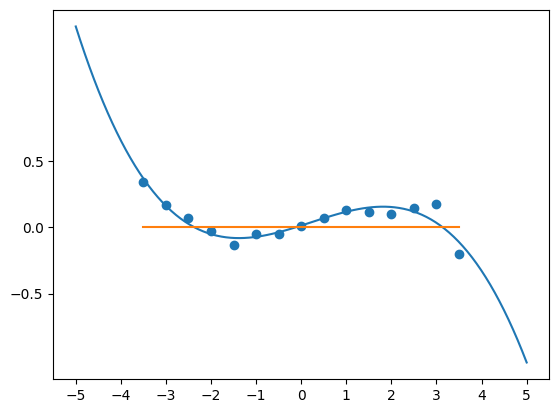

In [53]:
plt.scatter(table1['midPrior'], table1['condRet'])
plt.yticks([-0.5, 0,  0.5])
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
x = np.linspace(-5, 5, 100)
y = [np.polyval(coefficients, i) for i in x]
plt.plot(x,y)
plt.plot(table1['midPrior'], np.array([0] * 15))

# Figure 4

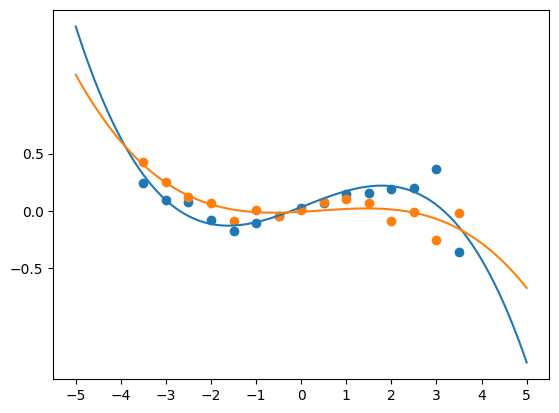

In [54]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.yticks([-0.5, 0,  0.5])
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
x = np.linspace(-5, 5, 100)
y = [np.polyval(coefficients_1, i) for i in x]
plt.plot(x,y)

y = [np.polyval(coefficients_2, i) for i in x]
plt.plot(x,y)

# Figure 5

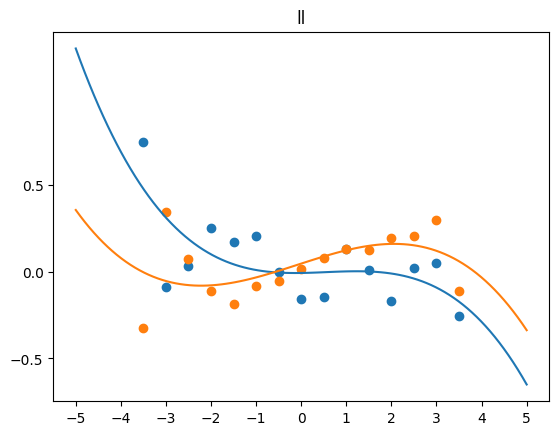

In [55]:
dataVolBig = data[data['volatility'] >= 0.25]
dataVolSmall = data[data['volatility'] < 0.25]
x1, y1 = compute_axis(dataVolBig)
x2, y2 = compute_axis(dataVolSmall)

coefficients_1 = np.polyfit(x1, y1, 3)
coefficients_2 = np.polyfit(x2, y2, 3)
plt.scatter(x1, y1)

plt.yticks([-0.5, 0,  0.5])
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
x = np.linspace(-5, 5, 100)
y = [np.polyval(coefficients_1, i) for i in x]
plt.plot(x,y)

plt.scatter(x2, y2)

y = [np.polyval(coefficients_2, i) for i in x]
plt.title('ll')
plt.plot(x,y)

# Figure 6

In [56]:
data['waste'] = data['condRet_table1']
for i in range(0, 21649):
    if((data['priorReturns'][i] < 2.25) & (data['priorReturns'][i] > 0.025)):
      continue
    elif((data['priorReturns'][i] > -2.25) & (data['priorReturns'][i] < 0.025)):
      data['waste'][i] = - data['waste'][i]
    else:
      data['waste'][i] = 0
data['bif'] = data['waste'].rolling(200).sum(skipna=True)
# fig = px.line(data.reset_index(), x='Date', y="bif_param", line_shape='hv')
# fig.show()
waste2 = pd.DataFrame()
date = []
min = []
avg = []
max = []
data['bif'] = data['bif'].fillna(0)
for i in range(200, 21649):
    date.append(data.reset_index()['Date'][i])
    min.append(data['bif'].iloc[i-199:i].min())
    avg.append((data['bif'].iloc[i-199:i].sum())/200)
    max.append(data['bif'].iloc[i-199:i].max())
    i += 1
dataframe = pd.DataFrame({'date': date, 'min': min, 'avg': avg, 'max': max}, columns=['date', 'min', 'avg', 'max'])
fig = px.line(dataframe, x='date', y=['min', 'avg', 'max'])
fig.show()

<ipython-input-56-b28fd3d51cd4>:9: FutureWarning:

Passing additional kwargs to Rolling.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.



#Figure 7

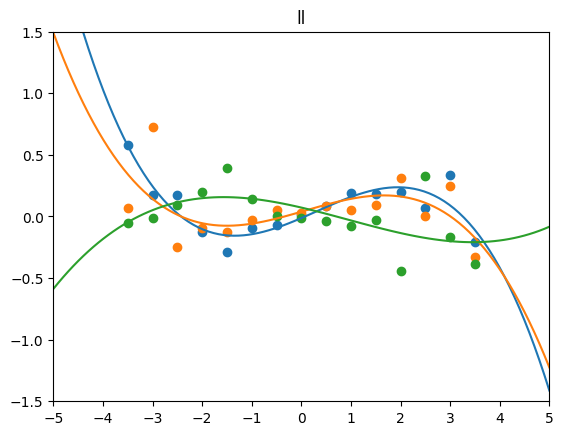

In [57]:
# FIGURE 7
dataframe = dataframe.set_index('date')
data = data.iloc[200:21649]
data = data.iloc[100:]
data = data.iloc[:21450]
data['bif'] = dataframe['avg']

dataBPBig = data[data['bif'] > 5]
dataBPMed = data[(data['bif'] < 5) & (data['bif'] > -5)].iloc[200:]
dataBPSmall = data[data['bif'] < -5]

# dataBPBig = dataframe[dataframe['avg'] > 5]
# dataBPMed = dataframe[(dataframe['avg'] < 5) & (dataframe['avg'] > -5)].iloc[200:]
# dataBPSmall = dataframe[dataframe['avg'] < -5]

x1, y1 = compute_axis(dataBPBig)
x2, y2 = compute_axis(dataBPMed)
x3, y3 = compute_axis(dataBPSmall)

coefficients_1 = np.polyfit(x1, y1, 3)
coefficients_2 = np.polyfit(x2, y2, 3)
coefficients_3 = np.polyfit(x3, y3, 3)

plt.scatter(x1, y1)

plt.yticks([-1.5, -1.0, -0.5, 0,  0.5, 1.0, 1.5])
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.xlim (-5, 5)
plt.ylim (-1.5, 1.5)
x = np.linspace(-5, 5, 100)
y = [np.polyval(coefficients_1, i) for i in x]
plt.plot(x,y)

plt.scatter(x2, y2)
y = [np.polyval(coefficients_2, i) for i in x]

plt.plot(x, y)

plt.scatter(x3, y3)
y = [np.polyval(coefficients_3, i) for i in x]

plt.title('ll')
plt.plot(x,y)

#Figure 8

In [58]:
data.loc["1975-01-01":]

,Close,Volume,priorReturns,volatility,condRet_table1,volume_change,waste,bif
Date,,,,,,,,
1975-01-02,632.00,1669173.0,2.564103,0.209319,0.395570,-0.294230,0.000000,43.544199
1975-01-03,634.50,1722181.0,0.395570,0.209276,0.425532,0.031757,0.425532,43.632432
1975-01-06,637.20,1979324.0,0.425532,0.209291,0.627746,0.149312,0.627746,43.713127
1975-01-07,641.20,1679324.0,0.627746,0.209388,-0.904554,-0.151567,-0.904554,43.799541
1975-01-08,635.40,1759399.0,-0.904554,0.209470,1.558074,0.047683,-1.558074,43.875586
...,...,...,...,...,...,...,...,...
2010-12-23,11573.49,100785762.0,0.121113,0.149135,-0.159502,-0.173981,-0.159502,-5.644499
2010-12-27,11555.03,76821041.0,-0.159502,0.149148,0.177498,-0.237779,-0.177498,-5.690423
2010-12-28,11575.54,114033762.0,0.177498,0.149149,0.085007,0.484408,0.085007,-5.734374


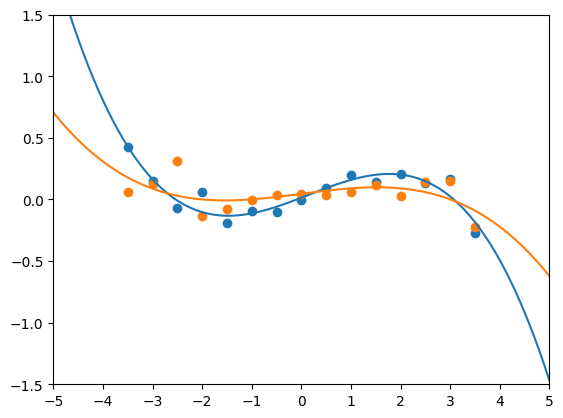

In [59]:
# FIGURE 8
# dataPre = data.iloc[0:15092]
dataPre = data.loc[:"1975-01-01"]
dataPost = data.loc["1975-01-01":]
x1, y1 = compute_axis(dataPre)
x2, y2 = compute_axis(dataPost)
coefficients_1 = np.polyfit(x1, y1, 3)
coefficients_2 = np.polyfit(x2, y2, 3)
plt.scatter(x1, y1)

plt.yticks([-1.5, -1.0, -0.5, 0,  0.5, 1.0, 1.5])
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.xlim (-5, 5)
plt.ylim (-1.5, 1.5)
x = np.linspace(-5, 5, 100)
y = [np.polyval(coefficients_1, i) for i in x]
plt.plot(x,y)

plt.scatter(x2, y2)
y = [np.polyval(coefficients_2, i) for i in x]

plt.plot(x, y)

# Figure 9

<ipython-input-60-d49c6564c2b3>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-d49c6564c2b3>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-d49c6564c2b3>:22: FutureWarning:

Passing additional kwargs to Rolling.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.



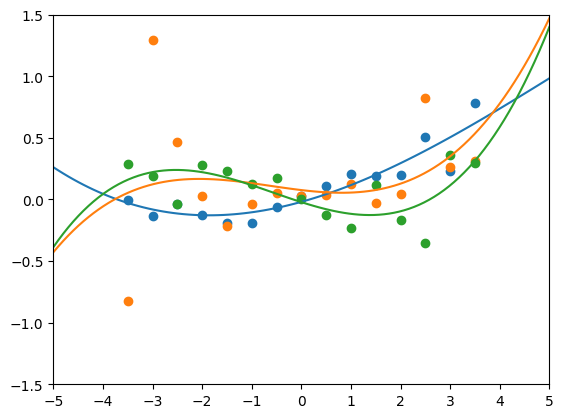

In [60]:
# FIGURE 9S

# datas = pd.read_csv("^spx_d(1962).csv", sep=';')
datas = pd.read_csv("^spx_d(1962).csv")
datas.drop(['Open', 'High', 'Low'], axis=1, inplace=True)
datas.set_index('Date', inplace=True)
datas['priorReturns'] = datas['Close'].pct_change()
datas['volatility'] = datas['priorReturns'].rolling(window=200).std()*(200**0.5)
datas['condRet_table1'] = datas['priorReturns'].shift(-1)
datas['priorReturns'] = datas['priorReturns'] * 100
datas['condRet_table1'] = datas['condRet_table1'] * 100
datas['waste'] = datas['condRet_table1']

for i in range(0, 12335):
  if((datas['priorReturns'][i] < 2.25) & (datas['priorReturns'][i] > 0.025)):
    continue
  elif((datas['priorReturns'][i] > -2.25) & (datas['priorReturns'][i] < 0.025)):
    datas['waste'][i] = - datas['waste'][i]
  else:
    datas['waste'][i] = 0

datas['bif'] = datas['waste'].rolling(200).sum(skipna=True)
dataBPBig = datas[datas['bif'] > 5]
dataBPMed = datas[(datas['bif'] < 5) & (datas['bif'] > -5)].iloc[200:]
dataBPSmall = datas[datas['bif'] < -5]
x1, y1 = compute_axis(dataBPBig)
x2, y2 = compute_axis(dataBPMed)
x3, y3 = compute_axis(dataBPSmall)
coefficients_1 = np.polyfit(x1, y1, 3)
coefficients_2 = np.polyfit(x2, y2, 3)
coefficients_3 = np.polyfit(x3, y3, 3)
plt.scatter(x1, y1)

plt.yticks([-1.5, -1.0, -0.5, 0,  0.5, 1.0, 1.5])
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.xlim (-5, 5)
plt.ylim (-1.5, 1.5)
x = np.linspace(-5, 5, 100)
y = [np.polyval(coefficients_1, i) for i in x]
plt.plot(x,y)

plt.scatter(x2, y2)
y = [np.polyval(coefficients_2, i) for i in x]

plt.plot(x, y)

plt.scatter(x3, y3)
y = [np.polyval(coefficients_3, i) for i in x]

plt.plot(x, y)

# Figure 10

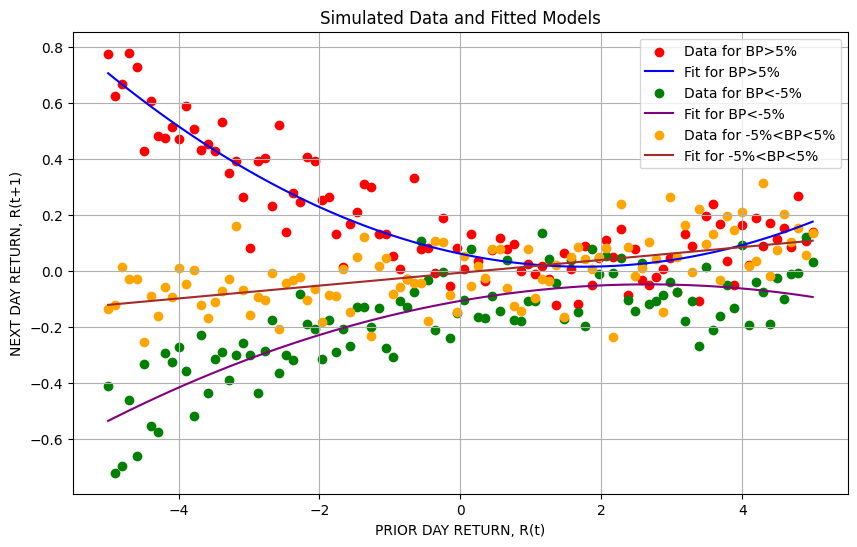

In [61]:
#FIGURE 10

np.random.seed(0)

def simulate_data(X, a, b, c, noise_level=0.1):
    noise = np.random.normal(0, noise_level, X.shape)
    return a * X**2 + b * X + c + noise

def fit_polynomial(X, Y, degree):
    return Polynomial.fit(X, Y, degree)

def fit_linear(X, Y):
    return np.poly1d(np.polyfit(X, Y, 1))

X = np.linspace(-5, 5, 100)

Y_bp_gt_5 = simulate_data(X, 0.01, -0.05, 0.1)
poly_bp_gt_5 = fit_polynomial(X, Y_bp_gt_5, 2)

Y_bp_lt_5 = simulate_data(X, -0.01, 0.05, -0.1)
poly_bp_lt_5 = fit_polynomial(X, Y_bp_lt_5, 2)

Y_bp_range = simulate_data(X, 0, 0.02, 0)
linear_bp_range = fit_linear(X, Y_bp_range)

plt.figure(figsize=(10, 6))

plt.scatter(X, Y_bp_gt_5, color='red', label='Data for BP>5%')
plt.plot(X, poly_bp_gt_5(X), color='blue', label='Fit for BP>5%')

plt.scatter(X, Y_bp_lt_5, color='green', label='Data for BP<-5%')
plt.plot(X, poly_bp_lt_5(X), color='purple', label='Fit for BP<-5%')

plt.scatter(X, Y_bp_range, color='orange', label='Data for -5%<BP<5%')
plt.plot(X, linear_bp_range(X), color='brown', label='Fit for -5%<BP<5%')

plt.title('Simulated Data and Fitted Models')
plt.xlabel('PRIOR DAY RETURN, R(t)')
plt.ylabel('NEXT DAY RETURN, R(t+1)')
plt.legend()
plt.grid(True)
plt.show()

# Figure 11

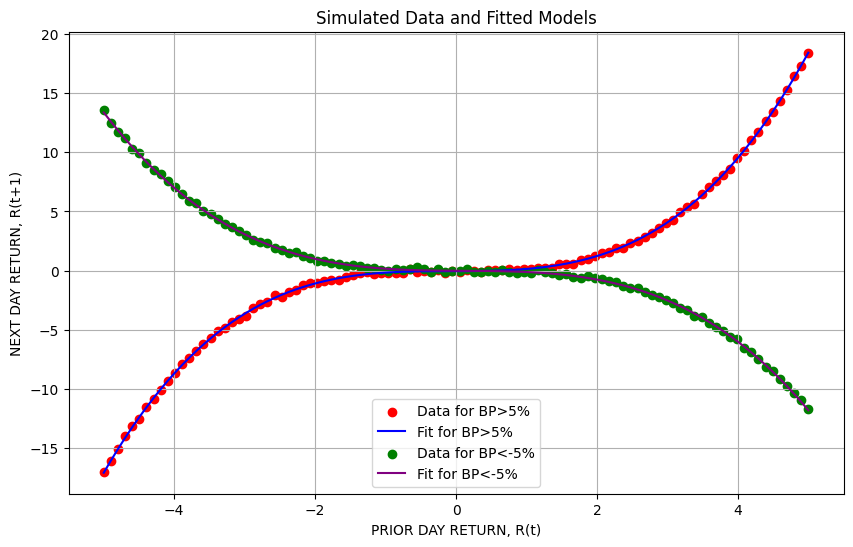

In [62]:
#FIGURE 11

np.random.seed(0)

def simulate_data(X, coeffs, noise_level=0.1):

    Y = np.polyval(coeffs[::-1], X)
    noise = np.random.normal(0, noise_level, X.shape)
    return Y + noise

def fit_polynomial(X, Y, degree):
    return Polynomial.fit(X, Y, degree)

X = np.linspace(-5, 5, 100)

coeffs_bp_gt_5 = [0.0008, 0.0175, 0.0231724, 0.14136]  # for "BP>5%"
coeffs_bp_lt_5 = [0.001, -0.02, 0.03, -0.1]  # for "BP<-5%"
coeffs_bp_range = [0, 0.02, 0]  # for "-5%<BP<5%"

Y_bp_gt_5 = simulate_data(X, coeffs_bp_gt_5)
Y_bp_lt_5 = simulate_data(X, coeffs_bp_lt_5)
Y_bp_range = simulate_data(X, coeffs_bp_range)

poly_bp_gt_5 = fit_polynomial(X, Y_bp_gt_5, 3)  # Assuming cubic
poly_bp_lt_5 = fit_polynomial(X, Y_bp_lt_5, 3)  # Assuming cubic
linear_bp_range = fit_polynomial(X, Y_bp_range, 1)  # Assuming linear

plt.figure(figsize=(10, 6))

# Plot for "BP>5%"
plt.scatter(X, Y_bp_gt_5, color='red', label='Data for BP>5%')
plt.plot(X, poly_bp_gt_5(X), color='blue', label='Fit for BP>5%')

# Plot for "BP<-5%"
plt.scatter(X, Y_bp_lt_5, color='green', label='Data for BP<-5%')
plt.plot(X, poly_bp_lt_5(X), color='purple', label='Fit for BP<-5%')


plt.title('Simulated Data and Fitted Models')
plt.xlabel('PRIOR DAY RETURN, R(t)')
plt.ylabel('NEXT DAY RETURN, R(t+1)')
plt.legend()
plt.grid(True)
plt.show()


# Figure 12

In [63]:
import plotly.express as px
dataPost= data.loc["1995-01-01":]
dataPosts = datas.loc["1995-01-01":]
dataPosts = dataPosts.iloc[0:4029]
dataPost['add'] = dataPosts['bif']
fig = px.line(dataPost.reset_index(), x='Date', y=["bif", 'add'])
fig.show()

<ipython-input-63-a8816ad42d76>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



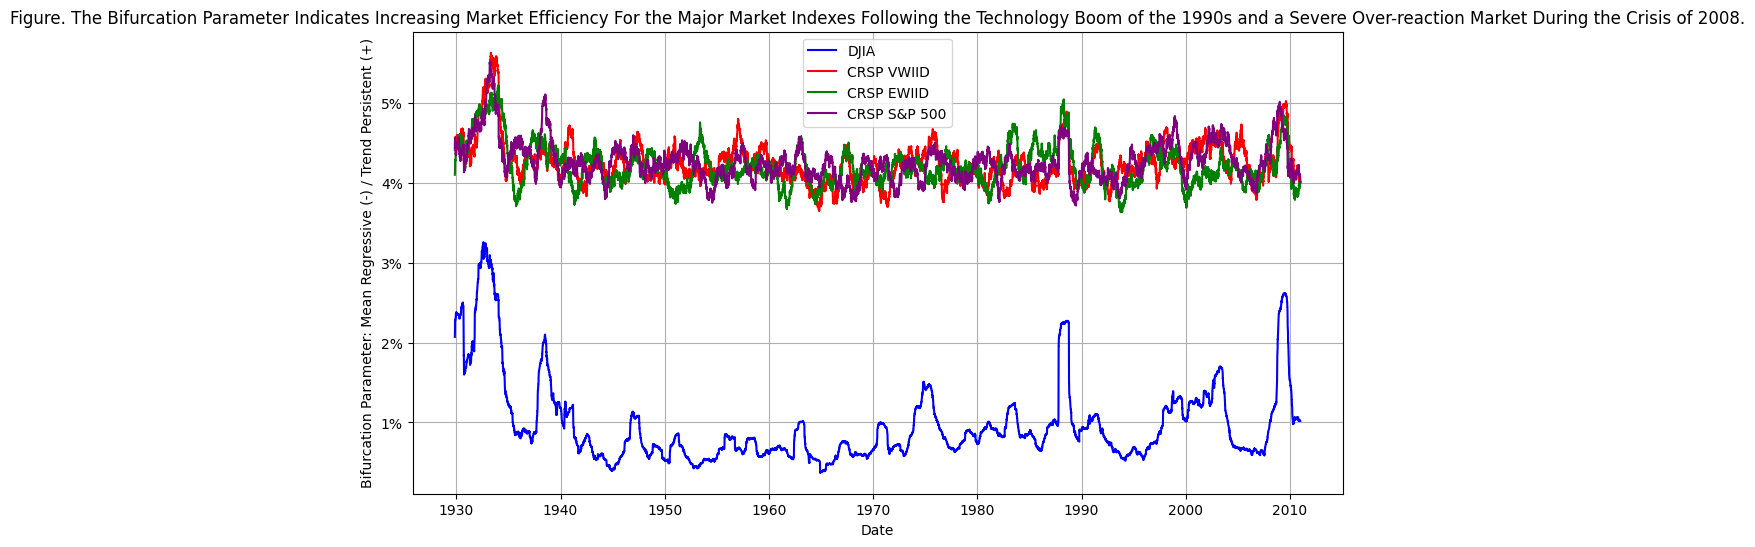

In [64]:
#FIGURE 12

from matplotlib.ticker import FuncFormatter

def percentage_formatter(x, pos):
    return f"{x:.0f}%"

def simulate_index_based_on_djia(djia_data, seed_multiplier):
    np.random.seed(seed_multiplier)
    simulated_data = djia_data.copy()
    simulated_data['Close'] = simulated_data['Close'] * (1 + (np.random.rand(len(simulated_data)) - 0.5) / 10)
    return simulated_data

def calculate_bifurcation_parameter(data):
    data['Return'] = data['Close'].pct_change()
    data['Bifurcation'] = data['Return'].rolling(window=252).std()  # yearly volatility (std dev)
    return data

dji = pd.read_csv("^dji_d (1929).csv")
dji['Date'] = pd.to_datetime(dji['Date'])

# Simulate the other indices based on DJIA data
crsp_vwiid = simulate_index_based_on_djia(dji, seed_multiplier=2)
crsp_ewiid = simulate_index_based_on_djia(dji, seed_multiplier=3)
crsp_sp500 = simulate_index_based_on_djia(dji, seed_multiplier=4)

# Calculate bifurcation parameters
dji = calculate_bifurcation_parameter(dji)
crsp_vwiid = calculate_bifurcation_parameter(crsp_vwiid)
crsp_ewiid = calculate_bifurcation_parameter(crsp_ewiid)
crsp_sp500 = calculate_bifurcation_parameter(crsp_sp500)

# Create the plot
plt.figure(figsize=(12, 6))

plt.plot(dji['Date'], dji['Bifurcation'] * 100, label='DJIA', color='blue')
plt.plot(crsp_vwiid['Date'], crsp_vwiid['Bifurcation'] * 100, label='CRSP VWIID', color='red')
plt.plot(crsp_ewiid['Date'], crsp_ewiid['Bifurcation'] * 100, label='CRSP EWIID', color='green')
plt.plot(crsp_sp500['Date'], crsp_sp500['Bifurcation'] * 100, label='CRSP S&P 500', color='purple')

plt.xlabel('Date')
plt.ylabel('Bifurcation Parameter: Mean Regressive (-) / Trend Persistent (+)')
plt.title('Figure. The Bifurcation Parameter Indicates Increasing Market Efficiency For the Major Market Indexes Following the Technology Boom of the 1990s and a Severe Over-reaction Market During the Crisis of 2008.')
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.grid(visible=True)
plt.show()
